<a href="https://colab.research.google.com/github/PraveenAnanth5451/Deep_Learning_Projects/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"praveenananth","key":"3bb91d2a88b1305405a80f8d226baa9f"}'}

In [40]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d biaiscience/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [42]:
import os
# Counting the number oof files in train folder
path, dirs, files = next(os.walk("/content/train/train"))
file_count = len(files)
print(file_count)

25000


Import the Dependencies

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [44]:
file_name = os.listdir("/content/train/train")
print(file_name)

['cat.10520.jpg', 'dog.6901.jpg', 'dog.2926.jpg', 'cat.8255.jpg', 'cat.11308.jpg', 'cat.7625.jpg', 'cat.11907.jpg', 'dog.4655.jpg', 'cat.2895.jpg', 'cat.3020.jpg', 'dog.7094.jpg', 'dog.8690.jpg', 'cat.10926.jpg', 'cat.5464.jpg', 'dog.632.jpg', 'dog.7543.jpg', 'cat.3119.jpg', 'dog.9372.jpg', 'cat.1786.jpg', 'dog.5243.jpg', 'dog.11234.jpg', 'dog.6936.jpg', 'dog.3727.jpg', 'cat.3193.jpg', 'dog.1330.jpg', 'cat.4084.jpg', 'cat.2746.jpg', 'dog.2957.jpg', 'dog.12447.jpg', 'dog.2520.jpg', 'cat.6114.jpg', 'cat.6665.jpg', 'dog.3988.jpg', 'cat.10786.jpg', 'dog.7967.jpg', 'cat.11239.jpg', 'cat.8705.jpg', 'dog.7406.jpg', 'cat.12249.jpg', 'cat.3360.jpg', 'dog.9296.jpg', 'cat.1318.jpg', 'dog.6535.jpg', 'dog.10907.jpg', 'dog.11005.jpg', 'dog.11839.jpg', 'cat.1587.jpg', 'cat.2379.jpg', 'cat.5082.jpg', 'dog.11549.jpg', 'dog.9690.jpg', 'cat.4033.jpg', 'dog.8183.jpg', 'dog.2737.jpg', 'dog.7290.jpg', 'cat.662.jpg', 'dog.10299.jpg', 'dog.11875.jpg', 'cat.7848.jpg', 'dog.2294.jpg', 'dog.8564.jpg', 'cat.5459.

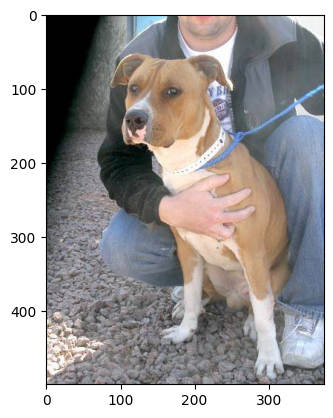

In [45]:
# display the dog image
img = mpimg.imread("/content/train/train/dog.3727.jpg")
imgplot = plt.imshow(img)
plt.show()

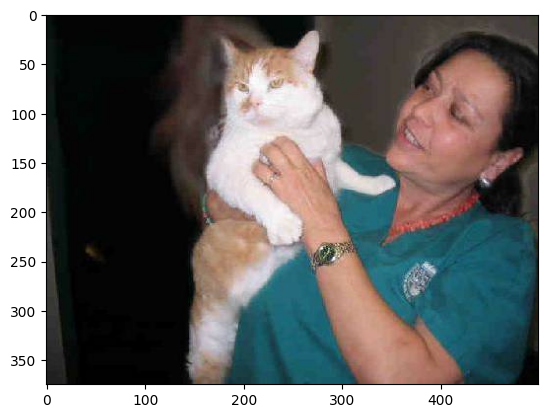

In [46]:
# display the image of cat
img = mpimg.imread("/content/train/train/cat.3727.jpg")
imgplot = plt.imshow(img)
plt.show()

In [47]:
# Create a directory for resized images
os.listdir("/content/image_resized")

['cat.10520.jpg',
 'dog.6901.jpg',
 'dog.2926.jpg',
 'cat.8255.jpg',
 'cat.11308.jpg',
 'cat.7625.jpg',
 'cat.11907.jpg',
 'dog.4655.jpg',
 'cat.2895.jpg',
 'cat.3020.jpg',
 'dog.7094.jpg',
 'dog.8690.jpg',
 'cat.10926.jpg',
 'cat.5464.jpg',
 'dog.632.jpg',
 'dog.7543.jpg',
 'cat.3119.jpg',
 'dog.9372.jpg',
 'cat.1786.jpg',
 'dog.5243.jpg',
 'dog.11234.jpg',
 'dog.6936.jpg',
 'dog.3727.jpg',
 'cat.3193.jpg',
 'dog.1330.jpg',
 'cat.4084.jpg',
 'cat.2746.jpg',
 'dog.2957.jpg',
 'dog.12447.jpg',
 'dog.2520.jpg',
 'cat.6114.jpg',
 'cat.6665.jpg',
 'dog.3988.jpg',
 'cat.10786.jpg',
 'dog.7967.jpg',
 'cat.11239.jpg',
 'cat.8705.jpg',
 'dog.7406.jpg',
 'cat.12249.jpg',
 'cat.3360.jpg',
 'dog.9296.jpg',
 'cat.1318.jpg',
 'dog.6535.jpg',
 'dog.10907.jpg',
 'dog.11005.jpg',
 'dog.11839.jpg',
 'cat.1587.jpg',
 'cat.2379.jpg',
 'cat.5082.jpg',
 'dog.11549.jpg',
 'dog.9690.jpg',
 'cat.4033.jpg',
 'dog.8183.jpg',
 'dog.2737.jpg',
 'dog.7290.jpg',
 'cat.662.jpg',
 'dog.10299.jpg',
 'dog.11875.jpg',
 

In [48]:
# original_folder = "/content/train/train/"
# resized_folder = "/content/image_resized/"

# for i in range(2000):
#   filename = os.listdir(original_folder)[i]
#   img_path = original_folder + filename

#   img = Image.open(img_path)
#   img = img.resize((224,224))
#   img = img.convert('RGB')

#   new_img_path = resized_folder + filename
#   img.save(new_img_path)

In [49]:
file_name = os.listdir("/content/image_resized")
print(file_name)

['cat.10520.jpg', 'dog.6901.jpg', 'dog.2926.jpg', 'cat.8255.jpg', 'cat.11308.jpg', 'cat.7625.jpg', 'cat.11907.jpg', 'dog.4655.jpg', 'cat.2895.jpg', 'cat.3020.jpg', 'dog.7094.jpg', 'dog.8690.jpg', 'cat.10926.jpg', 'cat.5464.jpg', 'dog.632.jpg', 'dog.7543.jpg', 'cat.3119.jpg', 'dog.9372.jpg', 'cat.1786.jpg', 'dog.5243.jpg', 'dog.11234.jpg', 'dog.6936.jpg', 'dog.3727.jpg', 'cat.3193.jpg', 'dog.1330.jpg', 'cat.4084.jpg', 'cat.2746.jpg', 'dog.2957.jpg', 'dog.12447.jpg', 'dog.2520.jpg', 'cat.6114.jpg', 'cat.6665.jpg', 'dog.3988.jpg', 'cat.10786.jpg', 'dog.7967.jpg', 'cat.11239.jpg', 'cat.8705.jpg', 'dog.7406.jpg', 'cat.12249.jpg', 'cat.3360.jpg', 'dog.9296.jpg', 'cat.1318.jpg', 'dog.6535.jpg', 'dog.10907.jpg', 'dog.11005.jpg', 'dog.11839.jpg', 'cat.1587.jpg', 'cat.2379.jpg', 'cat.5082.jpg', 'dog.11549.jpg', 'dog.9690.jpg', 'cat.4033.jpg', 'dog.8183.jpg', 'dog.2737.jpg', 'dog.7290.jpg', 'cat.662.jpg', 'dog.10299.jpg', 'dog.11875.jpg', 'cat.7848.jpg', 'dog.2294.jpg', 'dog.8564.jpg', 'cat.5459.

(224, 224, 3)


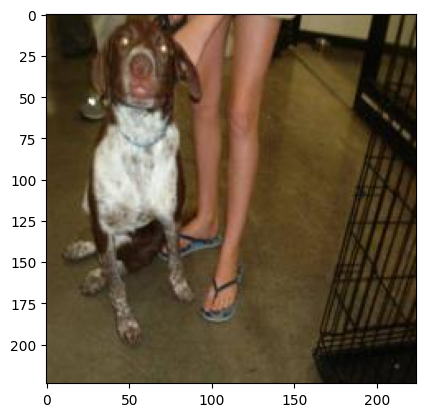

In [50]:
# Display the resized dog image
img = mpimg.imread("/content/image_resized/dog.1918.jpg")
print(img.shape)
img = plt.imshow(img)
plt.show()

print()

(224, 224, 3)


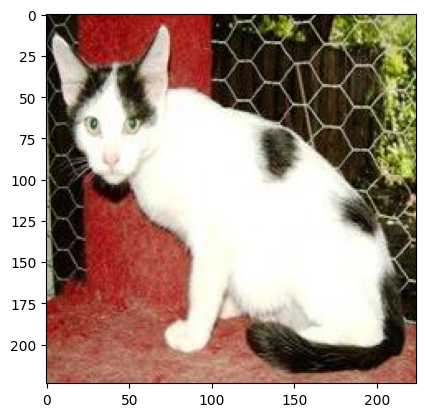

In [51]:
# Display the resized cat Image
img = mpimg.imread("/content/image_resized/cat.5934.jpg")
print(img.shape)
img = plt.imshow(img)
plt.show()


**Creating labels for resized images of dogs and cats**

Cat ---> 0

Dog ---> 1

In [52]:
# creating a for loop to assign labels
file_names = os.listdir("/content/image_resized/")
labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == "dog":
    labels.append(1)
  else:
    labels.append(0)

In [53]:
print(file_names[0:5])

['cat.10520.jpg', 'dog.6901.jpg', 'dog.2926.jpg', 'cat.8255.jpg', 'cat.11308.jpg']


In [54]:
labels[0:5]

[0, 1, 1, 0, 0]

In [55]:
# Counting images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values, counts)

[0 1] [1016  984]


onverting all the resized images to numpy arrays

In [56]:
import cv2
import glob

In [57]:
img_directory = "/content/image_resized/"
img_extension = ['png','jpg']

files = []

[files.extend(glob.glob(img_directory + '*' + e)) for e in img_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [58]:
print(dog_cat_images)

[[[[185 234 226]
   [185 234 226]
   [188 235 227]
   ...
   [168 221 218]
   [168 221 218]
   [168 221 218]]

  [[185 234 226]
   [185 234 226]
   [188 235 227]
   ...
   [168 221 218]
   [168 221 218]
   [168 221 218]]

  [[185 234 226]
   [185 234 226]
   [188 235 227]
   ...
   [167 220 217]
   [167 220 217]
   [167 220 217]]

  ...

  [[168 193 165]
   [163 188 160]
   [159 184 158]
   ...
   [221 220 206]
   [222 221 207]
   [223 222 208]]

  [[178 203 175]
   [169 194 166]
   [161 186 160]
   ...
   [240 238 227]
   [238 236 225]
   [239 237 226]]

  [[177 202 174]
   [167 192 164]
   [159 184 158]
   ...
   [250 248 237]
   [248 246 235]
   [248 246 235]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 61  67  80]
   [138 144 155]
   [148 157 167]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 64  70  83]
   [145 151 162]
   [158 167 177]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 63  69  82]
   [142 148 159]
   [151 160

In [59]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [60]:
type(dog_cat_images)

numpy.ndarray

In [61]:
X = dog_cat_images
y = np.asarray(labels)

In [62]:
X.shape, y.shape

((2000, 224, 224, 3), (2000,))

**Train Test Split**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600,), (400,))

In [65]:
# Scaling the data
X_train = X_train /255
X_test = X_test / 255

**Building a neural network**

In [66]:
import tensorflow as tf
import tensorflow_hub as hub

In [67]:
mobile_net_path = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model = hub.KerasLayer(mobile_net_path, input_shape=(224,224,3), trainable=False)

In [68]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [69]:
number_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(number_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [70]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['acc'])

In [71]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 87s 1s/step - loss: 0.2055 - acc: 0.9081
Epoch 2/5
50/50 [==============================] - 64s 1s/step - loss: 0.0624 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 73s 1s/step - loss: 0.0484 - acc: 0.9887
Epoch 4/5
50/50 [==============================] - 64s 1s/step - loss: 0.0365 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0314 - acc: 0.9912


In [72]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

13/13 [==============================] - 29s 2s/step - loss: 0.0705 - acc: 0.9750
Test Loss:  0.07047543674707413
Test Accuracy:  0.9750000238418579


**Predictive system**

In [79]:
from google.colab.patches import cv2_imshow

In [89]:
def prediction(image_path):
  input_image_path = image_path
  from google.colab.patches import cv2_imshow
  input_image = cv2.imread(input_image_path)
  plt.imshow(input_image)
  plt.axis(False)
  plt.show()
  input_image_resize = cv2.resize(input_image, (224,224))

  input_image_scaled = input_image_resize/255

  image_reshape = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshape)

  input_pred_label = np.argmax(input_prediction)

  if input_pred_label == 0:
    print("The image is a Cat")
  else:
    print("The image is a Dog")


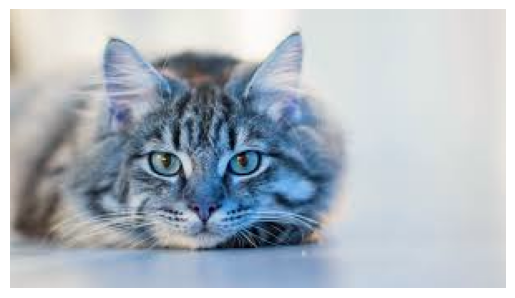

1/1 [==============================] - 0s 58ms/step
The image is a Cat


In [91]:
prediction("/content/images (1).jpeg")

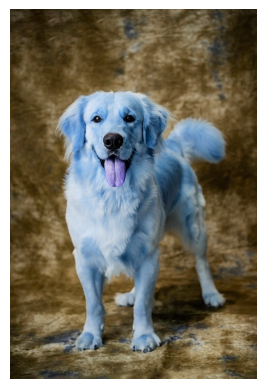

1/1 [==============================] - 0s 87ms/step
The image is a Dog


In [92]:
prediction("/content/dog-8198719_640.jpg")